**Import Data and Required Packages**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

**Import CSV Data**

In [3]:
df = pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Preparing X and y variables**

In [5]:
X = df.drop(columns = ['math_score'], axis =1)

In [6]:
y = df['math_score']

**Create Column Transformer with 3 types of transformers.**

In [8]:
num_features = X.select_dtypes(exclude = 'object').columns
cat_features = X.select_dtypes(include = 'object').columns

In [9]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
Oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', Oh_transformer, cat_features),
        ('StandardScaler', numeric_transformer, num_features)
    ]
)

In [10]:
X = preprocessor.fit_transform(X)

In [11]:
X.shape

(1000, 19)

**Seperate Dataset into training and test split.**

In [12]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

((800, 19), (200, 19))

**Create an Evaluate Function to give all metrics after model Training.**

In [17]:
def evaluate_model(true, prediction):
    mae = mean_absolute_error(true, prediction)
    rmse = np.sqrt(mean_squared_error(true, prediction))
    r2 = r2_score(true, prediction)
    return mae, r2, rmse

In [19]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.8743
- Mean Absolute Error: 4.2667
- R2 Score: 5.3231
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.8804
- Mean Absolute Error: 4.2148
- R2 Score: 5.3940


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.8071
- Mean Absolute Error: 5.2063
- R2 Score: 6.5938
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.8253
- Mean Absolute Error: 5.1579
- R2 Score: 6.5197


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.8743
- Mean Absolute Error: 4.2650
- R2 Score: 5.3233
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.8806
- Mean Absolute Error: 4.2111
- R2 Score: 5.3904


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.8554
- Mean Absolute Error: 4.5175
- R2 Score: 5.7091
-----------------------

**Results**

In [20]:
pd.DataFrame(list(zip(model_list, r2_list)), columns = ['Model Name', 'R2_Score']).sort_values(by = ['R2_Score'], ascending = False)

,Model Name,R2_Score
4,Decision Tree,7.770779
3,K-Neighbors Regressor,7.258333
1,Lasso,6.519695
6,XGBRegressor,6.473307
7,CatBoosting Regressor,6.008632
5,Random Forest Regressor,5.979986
8,AdaBoost Regressor,5.979354
0,Linear Regression,5.393994
2,Ridge,5.390387


**Linear Regression**

In [22]:
lin_model = LinearRegression(fit_intercept= True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred) * 100
print("R2 Accuracy of the model is %.2f" %score)

R2 Accuracy of the model is 88.04


**Plot y_test and y_pred**

Text(0, 0.5, 'Predicted')

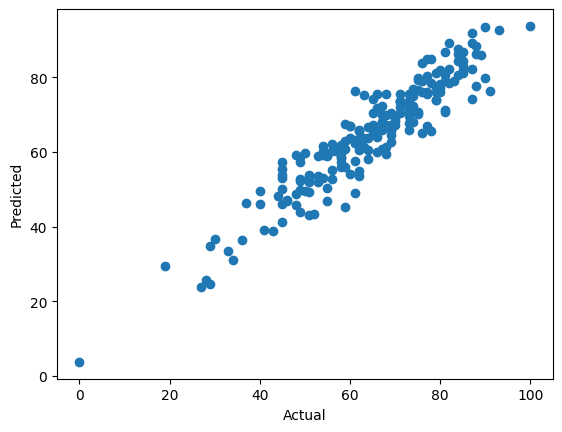

In [23]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

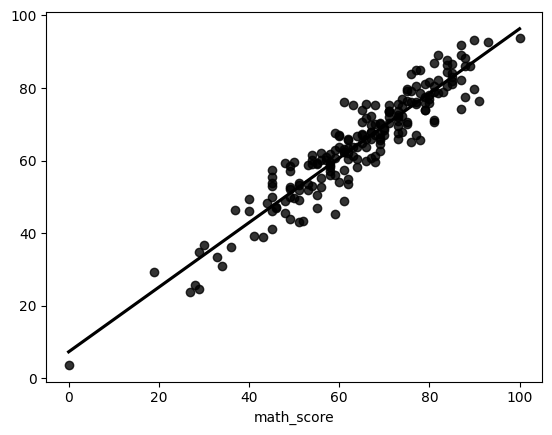

In [25]:
sns.regplot(x = y_test, y = y_pred, ci = None, color = 'black')

**Difference between Actual and Predicted Values**

In [30]:
pred_df = pd.DataFrame({
    'Actual Value':y_test,
    'Predicted Value':y_pred,
    'Difference':y_test - y_pred
})

In [33]:
pred_df.Difference.describe()

count    200.000000
mean      -0.237039
std        5.402306
min      -15.255711
25%       -3.734215
50%       -0.431768
75%        3.089311
max       14.612030
Name: Difference, dtype: float64